# Jonathan Halverson
# Friday, November 24, 2017
# CNN on MNIST

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
batch_size = 200
X_batch, y_batch = mnist.train.next_batch(batch_size)
X_batch.shape

(200, 784)

We need to reshape the data for a 2-d convolutional net:

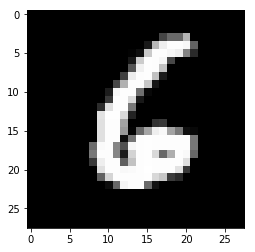

In [4]:
X_batch = X_batch.reshape(batch_size, 28, 28, 1)
single_digit = X_batch[42, :, :, 0]
plt.imshow(single_digit, cmap='gray')

In [5]:
X_valid = mnist.validation.images.reshape(-1, 28, 28, 1)
y_valid = mnist.validation.labels
X_test = mnist.test.images.reshape(-1, 28, 28, 1)
y_test = mnist.test.labels

In [6]:
tf.reset_default_graph()

In [7]:
X = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28, 1), name="X")
y = tf.placeholder(dtype=tf.int64, shape=(None), name="y")

In [8]:
conv_1 = tf.layers.conv2d(X, filters=10, kernel_size=7, strides=[2, 2], padding="SAME", activation=tf.nn.relu)
max_pool_1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
conv_2 = tf.layers.conv2d(max_pool_1, filters=5, kernel_size=2, strides=[2, 2], padding="SAME", activation=tf.nn.relu)
max_pool_2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
logits = tf.layers.dense(tf.reshape(max_pool_2, [-1, 20]), units=10, activation=None, name='outputs')

init = tf.global_variables_initializer()
with tf.Session() as sess:
     init.run()
     X_batch, y_batch = mnist.train.next_batch(batch_size)
     X_batch = X_batch.reshape(batch_size, 28, 28, 1)
     output = logits.eval(feed_dict={X:X_batch, y:y_batch})
output.shape

In [9]:
with tf.name_scope('loss'):
     xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
     loss = tf.reduce_mean(xentropy, name='loss')

In [10]:
learning_rate = 0.001
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9, use_nesterov=True)
training_op = optimizer.minimize(loss)

In [11]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
cm = tf.confusion_matrix(y, tf.arg_max(logits, dimension=1))

In [12]:
init = tf.global_variables_initializer()

In [13]:
batch_size = 200
n_epochs = 15

In [14]:
with tf.Session() as sess:
     init.run()
     for epoch in xrange(n_epochs):
          for iteration in range(mnist.train.num_examples // batch_size):
               X_batch, y_batch = mnist.train.next_batch(batch_size)
               X_batch = X_batch.reshape(-1, 28, 28, 1)
               sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
          print epoch, "train:", accuracy.eval(feed_dict={X:X_valid, y:y_valid})
     print "test:", accuracy.eval(feed_dict={X:X_test, y:y_test})
     print "CM:\n", cm.eval(feed_dict={X:X_test, y:y_test})

0 train: 0.2734
1 train: 0.3464
2 train: 0.4804
3 train: 0.6262
4 train: 0.714
5 train: 0.7788
6 train: 0.815
7 train: 0.842
8 train: 0.8588
9 train: 0.8704
10 train: 0.8842
11 train: 0.8926
12 train: 0.8974
13 train: 0.9018
14 train: 0.906
test: 0.9078
CM: [[ 941    0    4    3    2    6   18    2    3    1]
 [   0 1109    6    4    2    0    6    1    7    0]
 [  13    7  895   31   16    2   12   20   31    5]
 [   6    1   23  897    1   32    2    8   31    9]
 [   3    7    4    3  900    0    9    2    5   49]
 [   8    2    3   51    2  777    7    1   30   11]
 [  25    6    7    0   10   16  884    0   10    0]
 [   9   11   34    8    7    3    0  926    3   27]
 [   8   12    8   21    4   14    8    8  867   24]
 [  16    8    8    7   39    6    1   28   14  882]]
